図11.7のプロット

In [1]:
#計算とグラフプロットに必要なモジュールの読み込み
import numpy as np
from control import matlab
from matplotlib import pyplot as plt
from scipy import arange 
from scipy import signal

In [2]:
#1次遅れ系のパラメータを与える
K = 1 #K=1
T1 = 0.01 #T=0.01
T2 = 1 #T=1
T3 = 100 #T=100

#1次遅れ系の分子・分母多項式を与える
num = [0, K] #分子多項式
den1 = [T1, 1] #T=0.01の場合の分母多項式
den2 = [T2, 1] #T=1の場合の分母多項式
den3 = [T3, 1] #T=100の分母多項式

#伝達関数表現を与える
sys1 = signal.lti(num, den1) #T=0.01の場合の伝達関数表現（signal.ltiの場合）
sys2 = signal.lti(num, den2) #T=1の場合の伝達関数表現（signal.ltiの場合）
sys3 = signal.lti(num, den3) #T=100の場合の伝達関数表現（signal.ltiの場合）

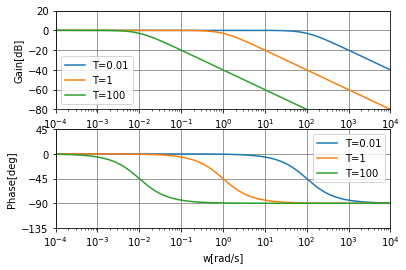

In [3]:
#角周波数の範囲を指定
w = np.logspace(-4, 4, 1000) #対数的に等間隔なベクトルの生成(10^{-4}から10^{4}で1000点)

#周波数応答の計算．wは角周波数，gainはゲイン,phaseは位相を表す
w1, gain1, phase1 = signal.bode(sys1, w) #ゲインと位相
w2, gain2, phase2 = signal.bode(sys2, w) #ゲインと位相
w3, gain3, phase3 = signal.bode(sys3, w) #ゲインと位相

# ゲイン線図のプロット
plt.subplot(2, 1, 1) #複数の図を並べるためのコマンド．2行1列の1行目という意味
plt.semilogx(w1, gain1, label="T=0.01") #ゲイン線図をプロット
plt.semilogx(w2, gain2, label="T=1") #ゲイン線図をプロット
plt.semilogx(w3, gain3, label="T=100") #ゲイン線図をプロット
plt.xlim([0.0001,10000]) #横軸（角周波数）の範囲の指定
plt.ylim([-80,20]) #縦軸（デシベル値）の範囲の指定
plt.yticks([-80,-60,-40,-20,0,20]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.ylabel("Gain[dB]") #縦軸のラベル表示
plt.legend() #凡例の表示

# 位相線図のプロット
plt.subplot(2, 1, 2) #複数の図を並べるためのコマンド．2行1列の2行目という意味
plt.semilogx(w1, phase1, label="T=0.01") #位相線図をプロット
plt.semilogx(w2, phase2, label="T=1") #位相線図をプロット
plt.semilogx(w3, phase3, label="T=100") #位相線図をプロット
plt.xlim([0.0001,10000]) #横軸の範囲の指定
plt.ylim([-135,0]) #縦軸の目盛表示
plt.yticks([-135,-90,-45,0,45]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Phase[deg]") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示